In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
import datetime
from ipywidgets import widgets
import matplotlib.image as mpimg
import os

import matplotlib
import scipy as scipy
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
from pylab import *
import matplotlib.patches as ptch
import datetime as dt
import matplotlib.dates as mdates
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)




In [2]:
os.getcwd()
#Put the directory where you have the xlsx files and figures:
MasterDir="/Users/bekzatajan/Job_ISWS/Bekzat_Python/Latest/"
InputDir=MasterDir+"Input/"

DidChoose=False

if(DidChoose==True):
    WhatChose=[20500110, 2, 3]
    
    
           #AUTO GRAB BSMP CREP FOX SQL:
OptionForFileUse=3 #CHOOSE FROM THE PREVIOUS LINE (0-5)<<

FileNameIs=["ICoastalDB_SQL_out_AUTO_pid_WQ.xlsx",
            "ICoastalDB_SQL_out_GRAB_pid_WQ.xlsx",
            "BSMP_DB.xlsx",
            "CREP_DB.xlsx",
            "FOX_DB.xlsx",
            "sql_output.xlsx"]

OutputFoldNames=["AUTO", "GRAB", "BSMP", "CREP", "FOX", "SQL"]
OutputDir=MasterDir+"Output/"+OutputFoldNames[OptionForFileUse]
ParStFileNamesEnds=["_revised","_revised","_BSMP","_CREP","_FOX","_revised"]
FileNameChosen=FileNameIs[OptionForFileUse]
ParStFileName="Parameter & Station Names"+ParStFileNamesEnds[OptionForFileUse]+".xlsx"

print("Project folder: " + MasterDir+"\n")
print("File you've chosen: "+FileNameChosen+"; "+ParStFileName+"\n")
print("Ouput dir is: " + OutputDir+"\n")

os.chdir(InputDir) 

Project folder: /Users/bekzatajan/Job_ISWS/Bekzat_Python/Latest/

File you've chosen: CREP_DB.xlsx; Parameter & Station Names_CREP.xlsx

Ouput dir is: /Users/bekzatajan/Job_ISWS/Bekzat_Python/Latest/Output/CREP



In [3]:
if(OutputFoldNames[OptionForFileUse]=="BSMP"):
    data = pd.read_excel(FileNameChosen,sheet_name='Sheet1')
else:
    data = pd.read_excel(FileNameChosen)
        
#data = pd.read_excel(r"/Users/bekzatajan/Job_ISWS/Bekzat_Python/Latest/Input/sql_output.xlsx")
data1 = pd.read_excel(ParStFileName)
data=pd.merge(data,data1,on='record_code',how='left')
data = data.replace(np.nan, '', regex=True)

In [4]:
#Draft cell for bekzat:
data.dtypes

record_code                         int64
Sample_ID                          object
Start_Date                 datetime64[ns]
Missing_Time                       object
parameter                          object
Operator                           object
Result_Value                       object
Reporting_Limit                    object
Remark_Code                        object
remark_description                 object
sample_comment                     object
result_comments                    object
Sample_Type_Description            object
Station_ID                          int64
Alias                              object
Latitude                          float64
Longitude                         float64
waterbody                          object
Assesment_ID                       object
Basin_ID                           object
Org_ID                             object
ParameterPlotName                  object
EDA_PlotsTitle                     object
WQ_NWQ                            

In [5]:
#data['year'] = pd.DatetimeIndex(data['Start_Date']).year
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# You can format your date as you wish
#data['Mon_Year'] = data['Start_Date'].dt.strftime('%b-%Y')
#data['Mon_Year'] = data['Start_Date'].dt.strftime('%m/%y')
data['Mon_Year'] = data['Start_Date'].dt.strftime('%d/%m/%y')
data['Month'] = data['Start_Date'].dt.strftime('%b')
data['Year'] = data['Start_Date'].dt.strftime('%Y')

#df['Month'] = df['ArrivalDate'].values.astype('datetime64[M]')


In [6]:
data['ParameterPlotName'] = data['ParameterPlotName'].str.replace('0','°')
data['EDA_PlotsTitle'] = data['EDA_PlotsTitle'].str.replace('0C','°C')

In [7]:
data.dtypes

record_code                         int64
Sample_ID                          object
Start_Date                 datetime64[ns]
Missing_Time                       object
parameter                          object
Operator                           object
Result_Value                       object
Reporting_Limit                    object
Remark_Code                        object
remark_description                 object
sample_comment                     object
result_comments                    object
Sample_Type_Description            object
Station_ID                          int64
Alias                              object
Latitude                          float64
Longitude                         float64
waterbody                          object
Assesment_ID                       object
Basin_ID                           object
Org_ID                             object
ParameterPlotName                  object
EDA_PlotsTitle                     object
WQ_NWQ                            

In [8]:
data["record_code"] = data["record_code"].astype(str)
data=data[data['Result_Value'].notna()]
data["Result_Value"] = pd.to_numeric(data.Result_Value, errors='coerce')

#np.arange(data["Mon_Year"][0], data["Mon_Year"][16000], 8000)
#data["Mon_Year"][0]

20100001


KeyboardInterrupt: 

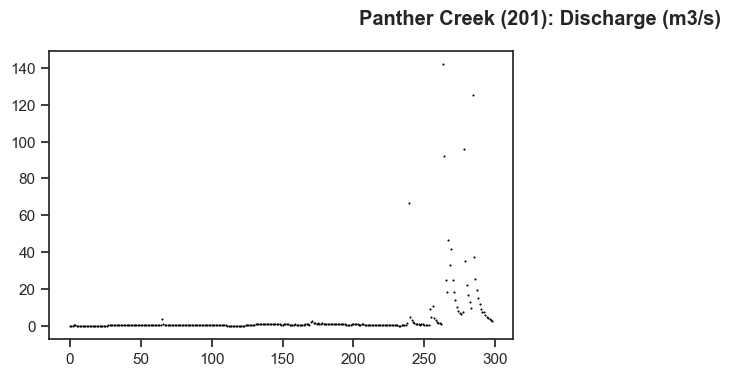

In [9]:
os.chdir(OutputDir)



def main():
    #grouped_df = data_concatenated.groupby('ParameterPlotName')
    for i, group in data.groupby('record_code'):
        if(len(group['Result_Value'])==0):
            continue
        if(DidChoose==True):
            if(i in WhatChose==False):
                continue    
        OrderMonthly2=unique(group['Month'])
        OrderMonthly = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'
        r = re.compile('|'.join([r'\b%s\b' % w for w in OrderMonthly2]), flags=re.I)
        OrderMonthlyInPlot=r.findall(OrderMonthly)

        
        #pdf = PdfPages(i+'EDAplots'+'.pdf')
        pdf = PdfPages(i+'EDAplots'+'.pdf')
        print(i)
        
        plotData(i,group, pdf, OrderMonthlyInPlot)
        pdf.close()
        
def plotData(i,group, pdf, OrderMonthlyInPlot):  
    #grouped.get_group("Chloride (mgL)")
      sns.set(style="ticks")
      PROPS = {
            'boxprops':{'facecolor':'none', 'edgecolor':'black'},
            'medianprops':{'color':'black'},
            'whiskerprops':{'color':'black'},
            'capprops':{'color':'black'}}
    
#      page_title = plt.title(group['EDA_PlotsTitle'].value_counts().index.tolist()[0],fontsize=8,style ='normal',color ="black",horizontalalignment='center',bbox ={'facecolor':'white',
#              'alpha':0.1, 'pad':0},verticalalignment='center', fontweight = 'bold',wrap=True)  
        
      fig1 = plt.figure(figsize=(11.7,8.27), dpi=100)       
      plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.12,wspace=0.19, hspace = 0.24)
      plt.suptitle(group['EDA_PlotsTitle'].value_counts().index.tolist()[0],fontweight ='bold',wrap=True,x=0.5,y=0.95)
        
      #plt.subplots_adjust(left=0.1, right=0.98, top=0.92, bottom=0.06,hspace=0, wspace=0.05)
      ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan=1)
      #page_title = ax1.text(0.7, 1.08, 'Water Quality Data Factsheet',fontsize=8,style ='normal',color ="black",horizontalalignment='left',bbox ={'facecolor':'white',
              #'alpha':0.1, 'pad':0},verticalalignment='top', fontweight = 'bold',wrap=True)
      plot1 = sns.stripplot(ax=ax1,x='Mon_Year', y='Result_Value', data=group, jitter=False, size = 1.5, color="black")
      plot1.set_xlabel("", size = 9)
      #plt.xticks(rotation = 0)
      #ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
      #ax1.xaxis.set_major_locator(AutoMajorLocator())
      ax1.xaxis.set_major_locator(AutoLocator())
      
      #ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
      #ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
      #ax1.xaxis.set_minor_locator(AutoMinorLocator())
      #plot1.set_xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
        # Title of the page
      #plt.axis('off')

    
      plot1.set_ylabel(group['ParameterPlotName'].value_counts().index.tolist()[0], size = 10)
      plt.xticks(fontsize=7)
      plt.yticks(fontsize=8)
      ax1.set_title('', fontweight ='bold', pad =15)
      #plt.xticks(rotation = 90) 
      plt.xticks(rotation = 30) 
      #ax1.set_title('Data Samples', fontweight ='bold', pad =12)
      plt.title('(a) Data Samples', y=-0.22, fontsize=10) 
    
      ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan = 1, colspan=1)
      plot2 = sns.boxplot(ax=ax2, x='Month', y='Result_Value', data = group, linewidth=0.5,color='w', showfliers=False,  width = 0.6, **PROPS, order = OrderMonthlyInPlot)#, positions=[0,2,4,6])
      plot2.set_xlabel("", size = 10)
      plot2.set_ylabel(group['ParameterPlotName'].value_counts().index.tolist()[0], size = 10)
      plt.xticks(fontsize=7)
      plt.yticks(fontsize=8)
      ax2.set_title('',fontweight ='bold', pad=10)
      plt.xticks(rotation = 0)
      #ax2.set_title('Panel 2', fontweight ='bold', pad =15)
      #ax2.set_title('Monthly Boxplots', fontweight ='bold', pad =12)
      plt.title('(b) Monthly Boxplots', y=-0.2, fontsize=10)
      
    
    
           
    
    
      ax3 = plt.subplot2grid((2, 2), (1, 0), rowspan = 1, colspan=1)
      plot3 = sns.boxplot(ax=ax3, x='Year', y='Result_Value', data = group, linewidth=0.5,color='w', showfliers=False,  width = 0.6, **PROPS)#, positions=[0,2,4,6])
      plot3.set_xlabel("", size = 10)
      plot3.set_ylabel(group['ParameterPlotName'].value_counts().index.tolist()[0], size = 10)
      plt.xticks(fontsize=7)
      plt.yticks(fontsize=8)
      ax3.set_title('',fontweight ='bold', pad=10)
      plt.xticks(rotation = 90)
      #ax3.set_title('Panel 3', fontweight ='bold', pad =15)
      #ax3.set_title('Annual Boxplots', fontweight ='bold', pad =12)
      plt.title('(c) Annual Boxplots', y=-0.24, fontsize=10)
        
      ax4 = plt.subplot2grid((2, 2), (1, 1), rowspan = 1, colspan=1)
      x = group['Result_Value']
      plt.xticks(fontsize=7)
      plt.yticks(fontsize=8)
      #x = 'Result_Value'
      #norm_cdf = scipy.stats.norm.cdf(x)
      #plot4 = sns.lineplot(ax= ax4,x= x, y= norm_cdf)
      ecdf = ECDF(x)
      print('P(x<20): %.3f' % ecdf(20))
      print('P(x<40): %.3f' % ecdf(40))
      print('P(x<60): %.3f' % ecdf(60)) 
      plot4 = sns.lineplot(ax= ax4,x= ecdf.x, y= ecdf.y)
      plot4.set_xlabel(group['ParameterPlotName'].value_counts().index.tolist()[0], size = 10)
      #plot4.set_xlabel("", size = 10)
      plot4.set_ylabel("Cumulative Frequency", size = 10)
      #ax4.set_title('Empirical CDF', fontweight ='bold', pad =12)
      plt.title('(d) Empirical CDF', y=-0.24, fontsize=10)
    
      pdf.savefig(fig1)
      plt.close()
    
     
    
if __name__ == "__main__":
    main()    

In [ ]:
import scipy
#data['cdf'] = data.rank(method = 'average', pct = True)
#data.sort_values('Result_Value').plot(x = 'Result_Value', y = 'cdf', grid = True)
x = data['Result_Value']
norm_cdf = scipy.stats.norm.cdf(x)
sns.lineplot(x=x, y=norm_cdf)
plt.show()

In [ ]:
data.dtypes

In [141]:
q=u"\N{DEGREE SIGN}"

In [45]:
print(q)

°


In [48]:
q="mim0C"

In [53]:
q.str.replace('0','°')

AttributeError: 'str' object has no attribute 'str'

In [51]:
print((u'\xb0'))

°


In [19]:
#OrderMonthly = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
OrderMonthly2 = ['Jan','Feb','Apr','Jun','Jul','Aug','Sep','Oct','Nov']
OrderMonthly = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'
r = re.compile('|'.join([r'\b%s\b' % w for w in OrderMonthly2]), flags=re.I)
OrderMonthlyInPlot=r.findall(OrderMonthly)

['Jan', 'Feb', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']